## Supplementary Figure 12 of Breast cancer

In [2]:
import pandas as pd
import numpy as np

# !pip install scikit-image
from skimage import data
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu
import sys
sys.path.append('../../scGCO_code/')


from scGCO_source import *

import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

D:\Annconda3\envs\spatial\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


#### input data as cell x genes, (cell as xxy location)

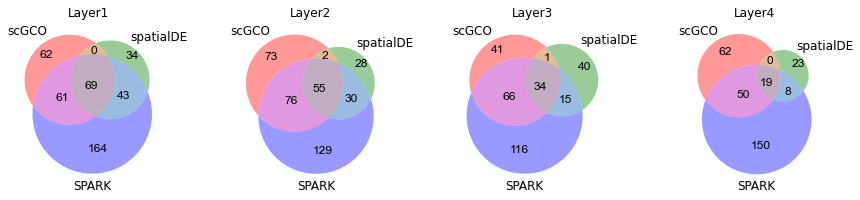

In [4]:
from ast import literal_eval
from matplotlib_venn import venn2,venn3

fig,axis=plt.subplots(1,4,figsize=(15,3))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #,
                                #top=0.925, right=0.925, bottom=0.075, left = 0.075)
gco_genes=[]
gco_array=[]
gco_size=[]

de_genes=[]
de_array=[]
de_size=[]

spark_genes=[]
spark_array=[]
spark_size=[]

overlap_gco_array=[]
overlap_gco_size= []

overlap_de_array = []
overlap_de_size =[]

overlap_spark_array=[]
overlap_spark_size = []
nn=0

for j in range(1,5):
    result_df=read_result_to_dataframe(
        '../../../results/BreastCancer/scGCO_results/Layers'+str(j)+'_result_df.csv')

    fdr_cut=0.01
    fdr_df_sct=result_df.loc[result_df.fdr< fdr_cut]
    count_gco=fdr_df_sct.index.values
    nn+= len(count_gco)
    gco_genes.extend(count_gco)
    gco_array.append(count_gco)
    gco_size.append(len(count_gco))

    spatialDE=pd.read_csv('../../../results/BreastCancer/SpatialDE_results/BC_{}_DE.csv'.format(j))
    count_de=spatialDE.g.values
    de_genes.extend(count_de)
    de_array.append(count_de)
    de_size.append(len(count_de))

    spark = pd.read_csv('../../../results/BreastCancer/SPARK_results/Layer{}_BC_spark.csv'.format(j))
    count_spark = spark.genes
    spark_genes.extend(count_spark)
    spark_array.append(count_spark)
    spark_size.append(len(count_spark))
    
    title='Layer'+str(j)
    y=(j-1)%4
   
    v=venn3(subsets=[set(count_gco),set(count_de),set(count_spark)],
            set_labels=['scGCO','spatialDE','SPARK'],
           ax=axis[y])
    axis[y].set_title(title)
    
    for text in v.subset_labels:
        text.set_fontsize(12)
        text.set_fontname('Arial')
        
    overlap_gco = (set(count_gco) & set(count_de)) |(set(count_gco) & set(count_spark))
    overlap_gco_array.append(overlap_gco)
    overlap_gco_size.append(len(overlap_gco))
    
    overlap_de = (set(count_de) & set(count_gco)) |(set(count_de) & set(count_spark))
    overlap_de_array.append(overlap_de)
    overlap_de_size.append(len(overlap_de))
    
    overlap_spark = (set(count_spark) & set(count_gco)) |(set(count_spark) & set(count_de))
    overlap_spark_array.append(overlap_spark)
    overlap_spark_size.append(len(overlap_spark))

plt.show()

In [6]:
fig.savefig('../../../results/Figure/Supple_Fig12a-BC_venn.pdf')

In [7]:
from scipy import stats
print(stats.ttest_ind(gco_size, de_size))

stats.ttest_ind(gco_size, spark_size)

Ttest_indResult(statistic=2.463998735260306, pvalue=0.04885371552165206)


Ttest_indResult(statistic=-3.2304995683221462, pvalue=0.017899246006416774)

## Supplementary Figure 12b - size 

In [8]:
y_mean= [np.mean(gco_size),np.mean(de_size),np.mean(spark_size)]
y_error = [np.std(gco_size), np.std(de_size), np.std(spark_size)]
print('mean: ', y_mean)
print('sd: ', y_error)

mean:  [167.75, 100.25, 271.25]
sd:  [31.877695964420013, 35.1452343853331, 45.42232380669223]


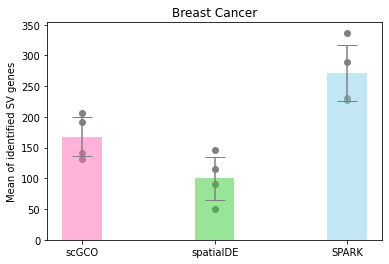

In [11]:
x=[1,2,3]
xlabels= ['scGCO', 'spatialDE','SPARK']
y_mean= [np.mean(gco_size),np.mean(de_size),np.mean(spark_size)]
y_error = [np.std(gco_size), np.std(de_size), np.std(spark_size)]
color = ['hotpink', 'limegreen','skyblue']
plt.bar(x, y_mean, width=0.3, color=color, yerr=y_error, align='center',alpha=0.5, ecolor='gray',capsize=10, tick_label=xlabels)

x_sca = np.array(x).repeat(4)
y_sca = gco_size.copy()
y_sca.extend(de_size)
y_sca.extend(spark_size)

plt.scatter(x_sca, y_sca, color='gray')
plt.ylabel('Mean of identified SV genes')
plt.title('Breast Cancer')
plt.savefig('../../../results/Figure/Supple_Fig12b-BC-mean_SVGenes.pdf')